In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,confusion_matrix
scaler = pp.StandardScaler()
pca = PCA(n_components=2)
linear = LinearRegression()
logic = LogisticRegression(max_iter=1000,class_weight='balanced')

In [2]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.dropna()
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
df_scaled = df.copy()
cols_for_scale = ['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index','Industrial_Waste (in tons)','Energy_Recovered (in GWh)','Energy_Consumption_Per_Capita (in MWh)','Renewable_Energy (%)']
scaler.fit(df[cols_for_scale])
df_scaled[cols_for_scale] = scaler.transform(df[cols_for_scale])

In [4]:
df_encoded = df_scaled.copy()
df_encoded['Country'] = df_encoded['Country'].astype('category')
df_encoded['Country'] = df_encoded['Country'].cat.codes
df_encoded.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,77,2005,1.376167,0.193880,-0.619764,1.543328,-0.697051,5.30,1.079423,37078.88,0.561742,42.22,20972.96
1,147,2001,-1.403578,-1.153098,1.028744,0.124915,1.618760,6.34,0.700701,33128.20,-0.756197,137.25,34850.41
2,136,2016,-1.330788,-0.668076,1.142400,0.123888,1.560644,49.69,-1.493780,18803.46,0.667825,124.47,57773.15
3,38,2018,1.494394,-1.009403,0.431675,0.809131,-0.785350,8.91,-0.716061,9182.27,-1.556310,67.80,21837.51
4,46,2008,-0.021926,0.262567,1.138106,0.882681,-1.499375,14.93,0.502825,39235.12,0.612087,186.52,41379.37


In [5]:
df_desp = df_encoded[['CO2_Emissions (in MT)','Industrial_Waste (in tons)']]
print(df_desp.describe())
print()
print(df_desp.median())
print()
print(df_desp.mode().iloc[0])
print()
print(df_desp.var())

       CO2_Emissions (in MT)  Industrial_Waste (in tons)
count             200.000000                2.000000e+02
mean               24.878100               -2.220446e-16
std                14.470892                1.002509e+00
min                 1.920000               -1.910136e+00
25%                11.220000               -7.986976e-01
50%                25.355000                8.865215e-02
75%                38.550000                8.069622e-01
max                49.690000                1.725110e+00

CO2_Emissions (in MT)         25.355000
Industrial_Waste (in tons)     0.088652
dtype: float64

CO2_Emissions (in MT)         5.300000
Industrial_Waste (in tons)   -1.910136
Name: 0, dtype: float64

CO2_Emissions (in MT)         209.406713
Industrial_Waste (in tons)      1.005025
dtype: float64


<Axes: >

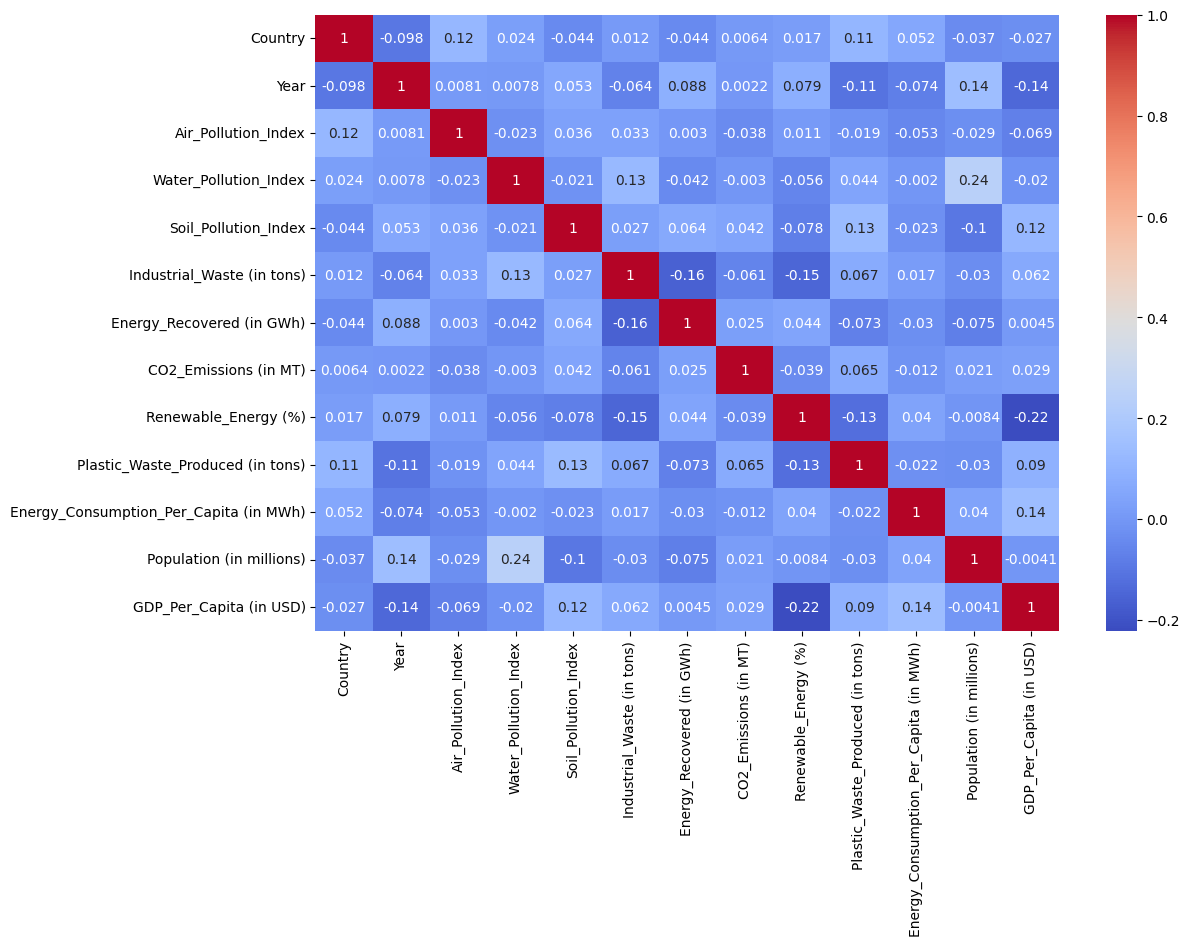

In [6]:
df_numeric = df_encoded.select_dtypes(include='number')
gr = df_numeric.corr()
plt.figure(figsize=(12,8))
sb.heatmap(gr,annot=True,cmap='coolwarm')

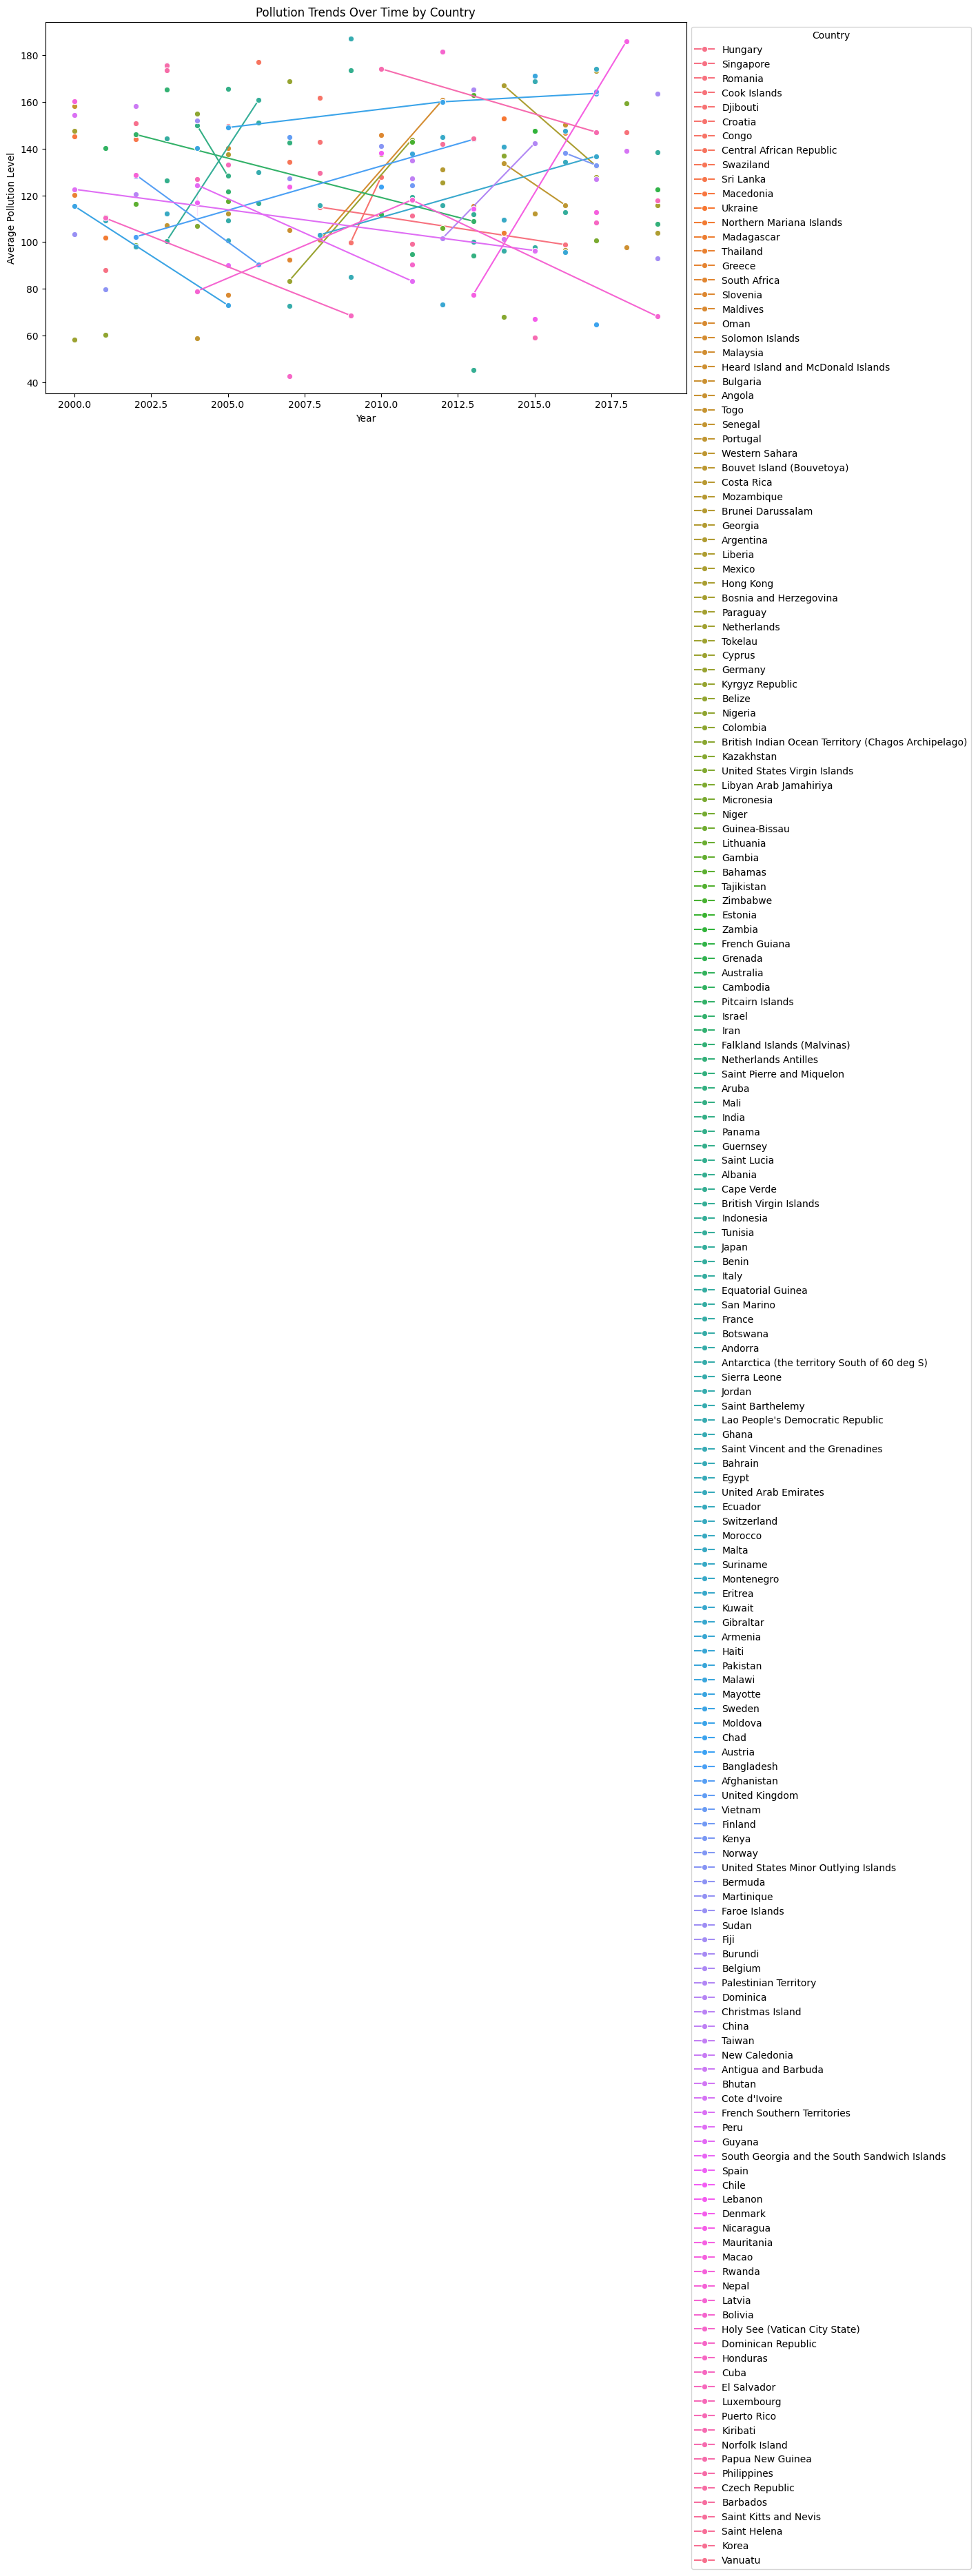

In [7]:
plt.figure(figsize=(12,7))
sb.lineplot(data=df.assign(Average=df[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index']].mean(axis=1)), x='Year', y='Average', hue='Country', marker='o')
plt.xlabel("Year")
plt.ylabel("Average Pollution Level")
plt.title("Pollution Trends Over Time by Country")
plt.legend(title='Country',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

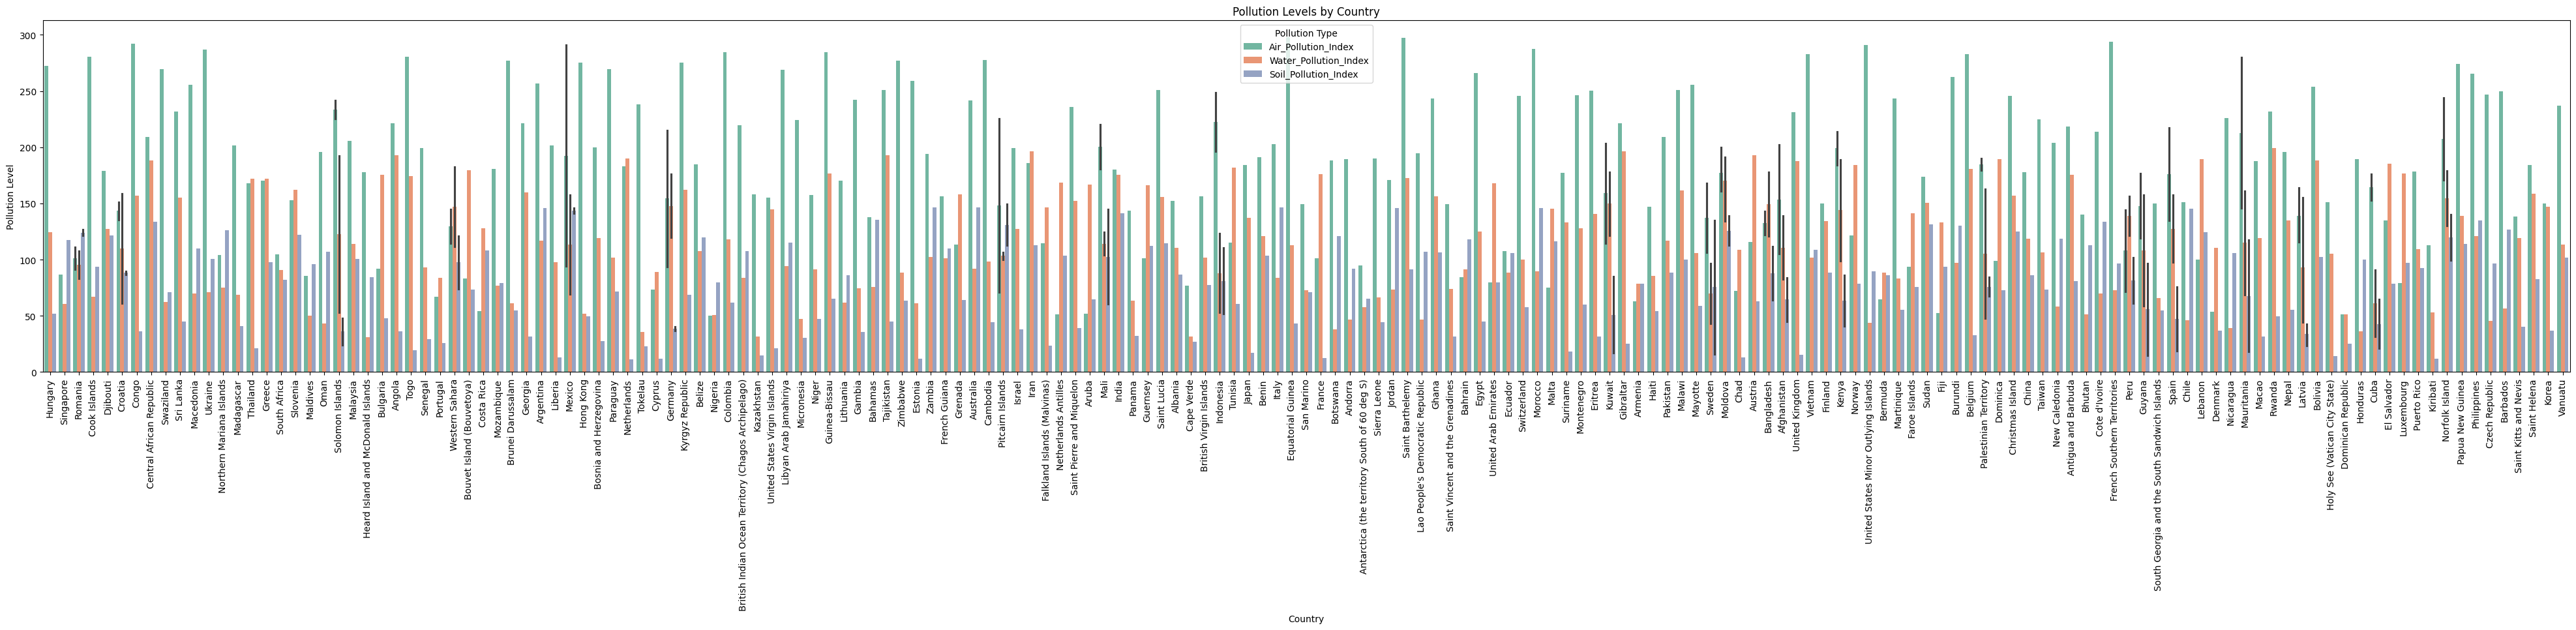

In [8]:
plt.figure(figsize=(50,7))
sb.barplot(
    data=df.melt(
        id_vars='Country',value_vars=['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index'],var_name='Pollution_Type',value_name='Pollution_Level'),
    x='Country',y='Pollution_Level',hue='Pollution_Type',palette='Set2'
)
plt.title("Pollution Levels by Country")
plt.xlabel("Country")
plt.ylabel("Pollution Level")
plt.legend(title="Pollution Type")
plt.xticks(rotation=90)
plt.show()

In [9]:
yearly_trends = df.groupby('Year')[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Energy_Recovered (in GWh)']].mean().reset_index()
print(yearly_trends)

    Year  Air_Pollution_Index  Water_Pollution_Index  Soil_Pollution_Index  \
0   2000           197.796000             118.513000             69.283000   
1   2001           137.964444              83.933333             71.340000   
2   2002           174.661538             123.617692             75.344615   
3   2003           203.103000             133.080000            100.687000   
4   2004           171.120909             120.719091             69.959091   
5   2005           179.756000             108.245333             72.922000   
6   2006           197.326667             115.016667            100.613333   
7   2007           174.349091             107.464545             55.718182   
8   2008           194.782857             102.114286             75.508571   
9   2009           200.440000              99.040000             68.994000   
10  2010           167.158750             148.862500             96.501250   
11  2011           174.016154             127.282308            

In [10]:
x = df_encoded[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index','CO2_Emissions (in MT)','Industrial_Waste (in tons)']]
y = df_encoded['Energy_Recovered (in GWh)']
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=42)
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)

In [11]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1.1390539304864382
0.9630203435736245
-0.0147142442814292


In [12]:
df_encoded['Pollution_Severity'] = pd.qcut(df['Air_Pollution_Index'],q=3,labels=["Low", "Medium", "High"])
df_encoded['Pollution_Severity'] = df_encoded['Pollution_Severity'].astype('category')
df_encoded['Pollution_Severity'] = df_encoded['Pollution_Severity'].cat.codes

In [13]:
x = df_encoded[['Country','CO2_Emissions (in MT)','Energy_Consumption_Per_Capita (in MWh)','Renewable_Energy (%)']]
y = df_encoded['Pollution_Severity']
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=100)
logic.fit(x_train,y_train)
y_pred = logic.predict(x_test)

In [14]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average="weighted"))
print(recall_score(y_test,y_pred,average="weighted"))
print(f1_score(y_test,y_pred,average="weighted"))
print(confusion_matrix(y_test,y_pred))

0.45
0.5079710144927536
0.45
0.42601010101010106
[[ 4  7  0]
 [ 1 10  2]
 [ 6  6  4]]


In this model, Linear regression is used to find the energy recovered using air pollution, water pollution, soil pollution, CO2 emission and Industrial waste & Logistic regression is used to find the pollution severity using country, CO2 emissions, energy consumption and renewable energy precentage. The scores achieved by both models given below;

## Linear Regression
1. MSE: 1.1390539304864382
2. MAE: 0.9630203435736245
3. R2: -0.0147142442814292

## Logistic Regression
1. Accuracy Score: 0.45
2. Precision Score: 0.5079710144927536
3. Recall Score: 0.45
4. F1 Score: 0.42601010101010106

Seems like this dataset is not optimal for linear and logistic regreassions. Both models have less accuracy. Key insight is industrial waste and plastic leading to soil pollution, water pollution & co2 emission leading to air pollution. Population is also factor for pollution, as years go by. Controlling these factors will help in regulating pollution.